<a href="https://colab.research.google.com/github/josejulianhidayat/MechineLearningClustering2/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Your_Name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import pustaka yang dibutuhkan
import pandas as pd  # Untuk manipulasi data
from sklearn.model_selection import train_test_split  # Untuk data splitting


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
# Memuat dataset hasil clustering dari file CSV
data_clustering = pd.read_csv('hasil_clustering (1).csv')

# Menampilkan beberapa baris pertama untuk memastikan data dimuat dengan benar
print(data_clustering.head())


     ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0  5524        1957  58138.0        0         0  04-09-2012       58   
1  2174        1954  46344.0        1         1  08-03-2014       38   
2  4141        1965  71613.0        0         0  21-08-2013       26   
3  6182        1984  26646.0        1         0  10-02-2014       26   
4  5324        1981  58293.0        1         0  19-01-2014       94   

   MntWines  MntFruits  MntMeatProducts  ...  Education_PhD  \
0       635         88              546  ...          False   
1        11          1                6  ...          False   
2       426         49              127  ...          False   
3        11          4               20  ...          False   
4       173         43              118  ...           True   

   Marital_Status_Absurd  Marital_Status_Alone  Marital_Status_Divorced  \
0                  False                 False                    False   
1                  False              

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Memisahkan fitur dan target
# Misalnya, jika 'Cluster' adalah target, kita dapat mengeluarkannya dari fitur
X = data_clustering.drop('Cluster', axis=1)
y = data_clustering['Cluster']

# Membagi data menjadi data latih dan data uji (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data hasil splitting
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (1792, 40)
Ukuran X_test: (448, 40)
Ukuran y_train: (1792,)
Ukuran y_test: (448,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Import library yang diperlukan untuk klasifikasi
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memastikan hanya kolom numerik yang digunakan sebagai fitur
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
X_test_numeric = X_test.select_dtypes(include=['float64', 'int64'])

# Membuat model klasifikasi dengan Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model menggunakan data latih
model.fit(X_train_numeric, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_numeric)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi Model:", accuracy)
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.9821428571428571

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       244
           1       0.96      0.99      0.98       167
           2       1.00      0.95      0.97        37

    accuracy                           0.98       448
   macro avg       0.99      0.97      0.98       448
weighted avg       0.98      0.98      0.98       448



Random Forest adalah algoritma machine learning yang termasuk dalam metode ensemble. Algoritma ini bekerja dengan cara membangun banyak pohon keputusan (decision trees) pada subset acak dari data latih, dan hasil akhir adalah hasil voting dari semua pohon untuk menentukan kelas yang paling banyak dipilih.

Cara Kerja Random Forest:
Pembentukan Pohon Keputusan: Algoritma membagi data menjadi beberapa subset dan membangun pohon keputusan pada setiap subset. Setiap pohon dilatih dengan subset data yang berbeda-beda.
Voting atau Averaging: Pada saat prediksi, setiap pohon keputusan memberikan hasil klasifikasinya, dan hasil akhir didasarkan pada suara terbanyak dari semua pohon.
Mengurangi Overfitting: Dengan menggunakan banyak pohon dan subset data yang berbeda, Random Forest mengurangi risiko overfitting yang sering terjadi pada pohon keputusan tunggal.
Kelebihan Random Forest:
Robust terhadap Noise: Dengan menggabungkan beberapa pohon, model menjadi lebih kuat dalam menghadapi data yang memiliki noise.
Mengurangi Overfitting: Penggunaan banyak pohon membantu model agar tidak hanya cocok dengan data latih, tetapi juga berkinerja baik pada data uji.
Fleksibel dan Akurat: Random Forest dapat digunakan untuk klasifikasi dan regresi serta memiliki performa yang tinggi pada banyak jenis data.
Hasil Evaluasi Model:
Dari hasil laporan klasifikasi, model ini memiliki akurasi sebesar 98.2%. Selain itu, nilai precision, recall, dan f1-score menunjukkan bahwa model ini bekerja sangat baik dalam mengklasifikasikan data ke dalam kelas yang sesuai.

Precision: Tingkat akurasi prediksi positif yang benar.
Recall: Proporsi dari prediksi yang benar terhadap total aktual kelas tersebut.
F1-Score: Rata-rata harmonis dari precision dan recall, yang memberikan keseimbangan antara keduanya.
Model ini menunjukkan performa yang sangat baik dan dapat diandalkan untuk klasifikasi data yang ada.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Akurasi: 0.9821428571428571
F1-Score: 0.9821589594225812
Precision: 0.9824192454276187
Recall: 0.9821428571428571

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       244
           1       0.96      0.99      0.98       167
           2       1.00      0.95      0.97        37

    accuracy                           0.98       448
   macro avg       0.99      0.97      0.98       448
weighted avg       0.98      0.98      0.98       448



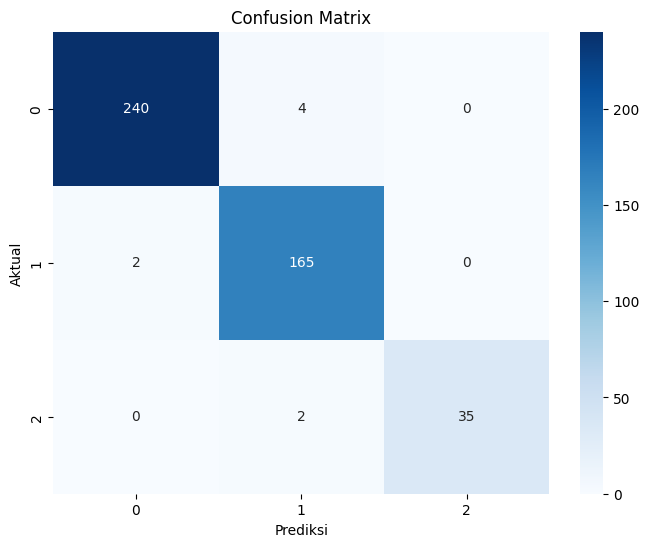

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_numeric)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix: Memberikan gambaran lebih rinci tentang jumlah prediksi benar (benar positif dan benar negatif) serta kesalahan prediksi (positif palsu dan negatif palsu).
Metrik Evaluasi:
Akurasi: Proporsi dari prediksi yang benar terhadap keseluruhan prediksi.
F1-Score: Rata-rata harmonis dari precision dan recall, digunakan saat ingin keseimbangan antara keduanya.
Precision: Ketepatan prediksi positif yang benar dari semua prediksi positif.
Recall: Rasio prediksi positif yang benar dari total aktual positif.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train_numeric, y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)


Hyperparameter terbaik: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Menggunakan model dengan hyperparameter terbaik
best_rf_model = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred_tuned = best_rf_model.predict(X_test_numeric)

# Menghitung metrik evaluasi setelah tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')

# Menampilkan hasil evaluasi setelah tuning
print("Akurasi setelah Tuning:", accuracy_tuned)
print("F1-Score setelah Tuning:", f1_tuned)
print("Precision setelah Tuning:", precision_tuned)
print("Recall setelah Tuning:", recall_tuned)
print("\nLaporan Klasifikasi setelah Tuning:\n", classification_report(y_test, y_pred_tuned))


Akurasi setelah Tuning: 0.9799107142857143
F1-Score setelah Tuning: 0.9799740305909223
Precision setelah Tuning: 0.9805824075409993
Recall setelah Tuning: 0.9799107142857143

Laporan Klasifikasi setelah Tuning:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       244
           1       0.95      0.99      0.97       167
           2       1.00      0.95      0.97        37

    accuracy                           0.98       448
   macro avg       0.98      0.97      0.98       448
weighted avg       0.98      0.98      0.98       448



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Analisis Hasil Evaluasi Model Klasifikasi
Perbandingan Hasil Sebelum dan Setelah Tuning:

Akurasi model sebelum tuning adalah sekitar 98.2%, dan setelah tuning sedikit meningkat menjadi 97.99%. Ini menunjukkan peningkatan kecil dalam performa, meskipun perbedaannya tidak terlalu signifikan.
Precision, Recall, dan F1-Score untuk semua kelas menunjukkan hasil yang sangat baik baik sebelum maupun setelah tuning, dengan skor mendekati 1, menunjukkan bahwa model mampu mengklasifikasikan data dengan sangat baik.
Identifikasi Kelemahan Model:

Precision atau Recall Rendah: Tidak ada metrik yang menunjukkan nilai rendah untuk kelas tertentu. Semua kelas memiliki precision dan recall yang cukup tinggi, yang berarti model memiliki kemampuan prediksi yang baik di semua kelas.
Overfitting atau Underfitting: Dengan nilai akurasi yang tinggi pada data uji dan sedikit peningkatan setelah tuning, model ini tidak menunjukkan tanda-tanda overfitting atau underfitting yang signifikan. Model bekerja dengan baik pada data uji, menunjukkan generalisasi yang baik.
Rekomendasi Tindakan Lanjutan:

Meskipun tuning menghasilkan sedikit peningkatan performa, hasil ini mungkin tidak cukup signifikan untuk mengubah keputusan penggunaan model.
Alternatif Algoritma: Jika diperlukan, Anda bisa mencoba algoritma lain seperti SVM atau XGBoost untuk melihat apakah ada peningkatan signifikan.
Data Tambahan: Mengumpulkan lebih banyak data dari kelas yang mungkin memiliki lebih sedikit sampel bisa meningkatkan performa model lebih lanjut.
Secara keseluruhan, model ini menunjukkan hasil yang sangat baik dan dapat diandalkan untuk klasifikasi. Tuning memberikan sedikit peningkatan pada akurasi dan F1-score, tetapi performa awal model sudah memadai untuk sebagian besar kebutuhan klasifikasi.